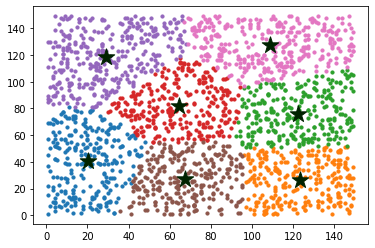

In [7]:
import random
import copy
import math
import sys
import matplotlib.pyplot as plt

# Config
class Kmeans_Config : 
    cluster_num = 7
    data_num = 2000
    iter_num = 500

# Random Data 생성.
def get_2d_datas(N):
    datas = []
    for i in range(N):
        a1 = random.randrange(1,150)
        a2 = random.randrange(1,150)
        datas.append([a1,a2])
    return datas

# cluster 초기화
def init_clusters(datas, cluster_num):
    datas_ = copy.deepcopy(datas)
    random.shuffle(datas_)
    clusters = []
    clusters.extend(datas_[:cluster_num])
    return clusters

# utils
def get_distance(data, cluster):
    x, y = data
    cx, cy = cluster
    return math.sqrt((x - cx)**2 + (y - cy)**2)

def get_mean_loc(c_datas):
    xs = 0
    ys = 0
    for x, y in c_datas:
        xs += x
        ys += y
    return (xs/len(c_datas), ys/len(c_datas))

# cluster에 data 할당
def data_assignment(datas, clusters):
    cluster_num = len(clusters)
    assigned_datas = [[] for i in range(cluster_num)]
    for data in datas :
        min_distance = sys.maxsize
        for i, c in enumerate(clusters):
            now_distance = get_distance(data, c)
            if now_distance < min_distance:
                min_idx = i
                min_distance = now_distance
        assigned_datas[min_idx].append(data)
    return assigned_datas

# cluster 재할당
def cluster_assignment(clusters, assigned_datas):
    for i, c in enumerate(clusters):
        cx, cy = get_mean_loc(assigned_datas[i])
        clusters[i] = [cx, cy]
    return clusters

# 클러스터링
def clustering(N, cluster_num, iter_num):
    datas = get_2d_datas(N)
    clusters = init_clusters(datas, cluster_num)
    for i in range(iter_num):
        assigned_datas = data_assignment(datas, clusters)
        clusters = cluster_assignment(clusters, assigned_datas)
    return clusters, assigned_datas

# visualization
def visualize(clusters, assigned_datas):
    # assigned_datas
    results = []
    for i in range(config.cluster_num):
        now_datas = assigned_datas[i]
        xs = [x for x, _ in now_datas]
        ys = [y for _, y in now_datas]
        results.append([xs, ys])

    for i in range(config.cluster_num):
        xs, ys = results[i]
        plt.scatter(xs, ys, s=10)

    # clusters
    xs = [x for x, _ in clusters]
    ys = [y for _, y in clusters]
    plt.scatter(xs, ys, marker='*', s=300, c='#002200')

if __name__ == '__main__':
    config = Kmeans_Config()
    clusters, assigned_datas = clustering(config.data_num, config.cluster_num, config.iter_num)
    visualize(clusters, assigned_datas)